In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import datetime
from citipy import citipy
import time
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import seaborn as sns
from scipy import stats

api_key = '728e45745a33a91d8c05fab213321cbd' 

# Output File (CSV)
output_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    country_code = city.country_code
    
    # If the city is unique, then add it to a our cities list & also add its corresponding country code
    if city_name not in cities:
        cities.append(city_name)
        country_codes.append(country_code)

In [5]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# Placeholder for API Calls
lat = []
lng = []
temp = []
humid = []
wind = []
cloud = []

# Get the variables
for x in range(len(cities)):
    response = requests.get(f"{query_url}{cities[x]}").json()
    
    # To avoid stopping the request because of NaN or add a zero instead:
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        wind.append(response["wind"]["speed"])
        cloud.append(response["clouds"]["all"])
    except KeyError:
        lat.append(np.nan)
        lng.append(np.nan)
        temp.append(np.nan)
        humid.append(np.nan)
        wind.append(np.nan)
        cloud.append(0)
    
    # Include a print log of each city as it is being processed 
    #(with the city number and city name).      
    print(f"{x + 1} | {cities[x]}")
    
print("----------------------------")
print("Data retrieval is complete")
print("----------------------------")

        

1 | ahipara
2 | barrow
3 | nikolskoye
4 | mataura
5 | poum
6 | san patricio
7 | cockburn town
8 | isangel
9 | chokurdakh
10 | rikitea
11 | punta arenas
12 | thompson
13 | akdepe
14 | nanuque
15 | grand river south east
16 | castro
17 | hami
18 | atuona
19 | sinjah
20 | ushuaia
21 | japura
22 | avarua
23 | changli
24 | tres arroyos
25 | jamestown
26 | vaini
27 | civitanova marche
28 | torbay
29 | aykhal
30 | north bend
31 | mosalsk
32 | imbituba
33 | geraldton
34 | taolanaro
35 | markova
36 | takoradi
37 | qaanaaq
38 | yatou
39 | belushya guba
40 | nouadhibou
41 | katherine
42 | hobyo
43 | east london
44 | albany
45 | srednekolymsk
46 | ponta do sol
47 | saintes
48 | baruun-urt
49 | deputatskiy
50 | kodiak
51 | bengkulu
52 | fairbanks
53 | bandarbeyla
54 | vaitupu
55 | port alfred
56 | saint-philippe
57 | kaitangata
58 | new norfolk
59 | gorno-chuyskiy
60 | port lincoln
61 | ouesso
62 | znamenskoye
63 | laguna
64 | sitka
65 | palembang
66 | lublin
67 | kulhudhuffushi
68 | butaritari
69 

In [6]:
# Convert Raw Data to DataFrame
cities_df = pd.DataFrame({"City": cities, "Latitude": lat, "Longitude": lng, 
                          "Temperature": temp, "Humidity": humid, "Wind Speed": wind, 
                          "Cloudiness": cloud})

# Drop any NA Value
cities_df =cities_df.dropna(how="any") 

# How many cities do we have? 
n_cities=len(cities_df)
#n_cities
print(n_cities)

cities_df.to_csv("cities_df.csv", index=False, header=True)


cities_df.head()

536


,City,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,ahipara,-35.17,173.17,16.60,71.0,1.99,50
1,barrow,71.29,-156.79,-19.00,77.0,4.60,90
2,nikolskoye,59.70,30.79,0.00,94.0,2.00,75
3,mataura,-46.19,168.86,8.37,76.0,1.54,0
4,poum,-20.23,164.02,24.95,70.0,5.19,70


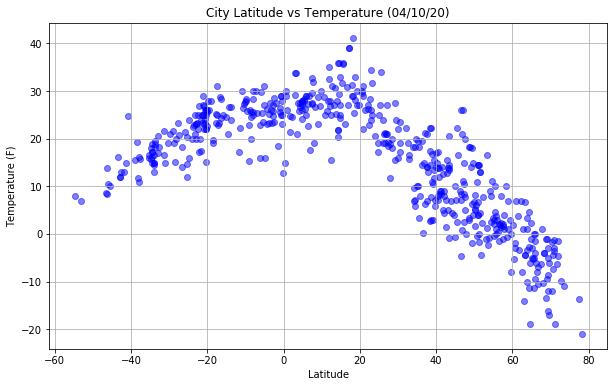

In [7]:
# Plotting the Data - Latitude vs. Temperature Plot
plt.figure(figsize=(10,6))
plt.scatter(cities_df["Latitude"], cities_df["Temperature"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Latitude vs Temperature ({datetime.datetime.now().strftime("%D")})')
plt.savefig("LatVsTemp.png")
plt.show()

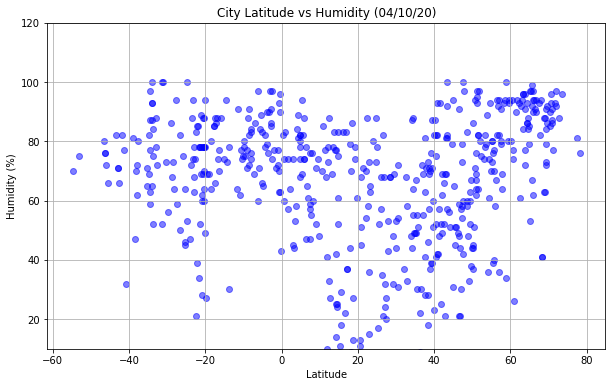

In [8]:
# Plotting the Data - Latitude vs. Humidity Plot
plt.figure(figsize=(10,6))
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.datetime.now().strftime("%D")})')
plt.savefig("LatVsHumidity.png")
plt.show()

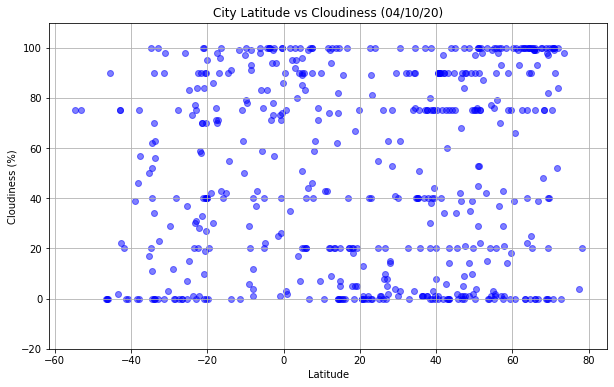

In [9]:

# Plotting the Data - Latitude vs. Cloudiness Plot
plt.figure(figsize=(10,6))
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], color='b', alpha=0.5)
plt.grid()
plt.ylim(-20,(cities_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.savefig("LatVsCloudiness.png")
plt.show()

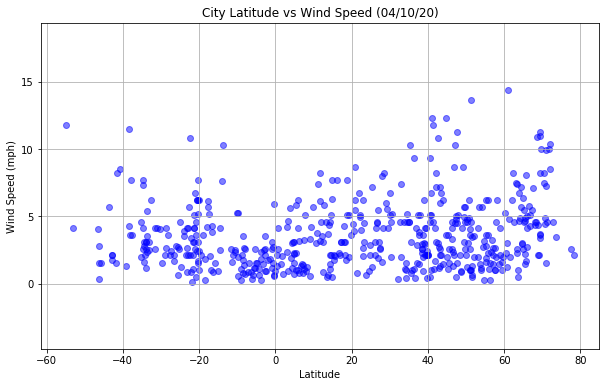

In [10]:
# Plotting the Data - Latitude vs. Wind Speed Plot
plt.figure(figsize=(10,6))
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"], color='blue', alpha=0.5)
plt.grid()
plt.ylim((cities_df["Wind Speed"].min()-5),(cities_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.savefig("LatVsWind.png")
plt.show()

In [11]:
# Initiating correlations

In [12]:
# Separating between North and South
North = cities_df[cities_df['Latitude'] >= 0]
South = cities_df[cities_df['Latitude'] < 0]


R squard: -0.8905826060937232


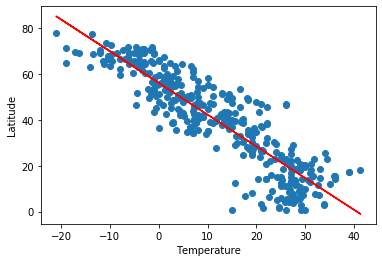

<Figure size 432x288 with 0 Axes>

In [21]:
# Convert to floats and store
x_values = North['Temperature'].astype('float')
y_values = North['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel('Temperature')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot and save plot
plt.show()

plt.savefig('CorrTempPosLat.png')

R squard: 0.7282563124263018


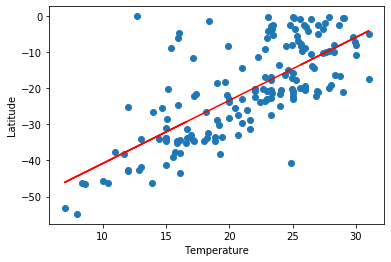

<Figure size 432x288 with 0 Axes>

In [22]:
# Convert to floats and store
x_values = South['Temperature'].astype('float')
y_values = South['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel('Temperature')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot and save plot
plt.show()

plt.savefig('CorrTempNegLat.png')

R squard: 0.340836583621759


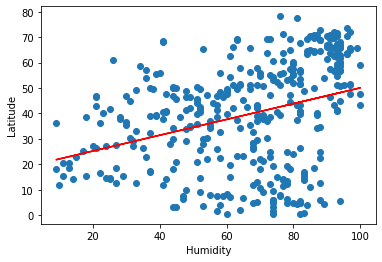

<Figure size 432x288 with 0 Axes>

In [23]:
# Convert to floats and store

x_values = North['Humidity'].astype('float')
y_values = North['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot and save plot
plt.show()

plt.savefig('CorrHumPosLat.png')

R squard: 0.13589249759506597


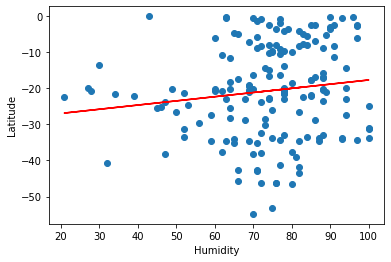

<Figure size 432x288 with 0 Axes>

In [24]:
# Convert to floats and store 

x_values = South['Humidity'].astype('float')
y_values = South['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot and save plot
plt.show()

plt.savefig('CorrHumNegLat.png')

R squard: 0.12655241229526765


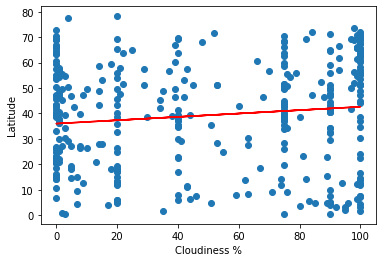

<Figure size 432x288 with 0 Axes>

In [25]:
# Convert to floats and store 

x_values = North['Cloudiness'].astype('float')
y_values = North['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel('Cloudiness %')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot and save plot
plt.show()

plt.savefig('CorrCloudPosLat.png')

R squard: 0.335998273283235


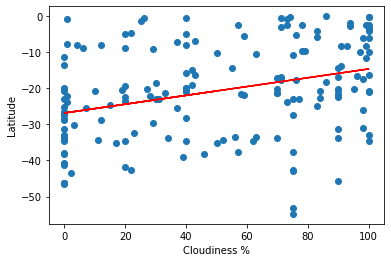

<Figure size 432x288 with 0 Axes>

In [26]:
# Convert to floats and store 

x_values = South['Cloudiness'].astype('float')
y_values = South['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel('Cloudiness %')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot and save plot
plt.show()

plt.savefig('CorrCloudNegLat.png')


R squard: 0.1999805032545914


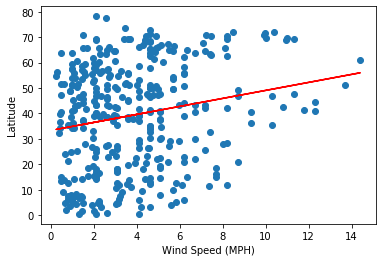

<Figure size 432x288 with 0 Axes>

In [27]:
# Convert to floats and store 

x_values = North['Wind Speed'].astype('float')
y_values = North['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot and save plot
plt.show()

plt.savefig('CorrWinPosLat.png')

R squard: -0.3351984174713144


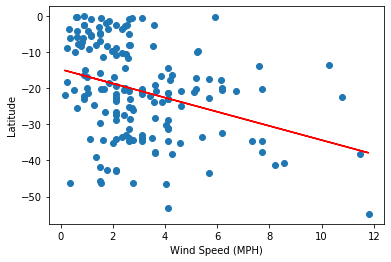

<Figure size 432x288 with 0 Axes>

In [28]:
# Convert to floats and store 

x_values = South['Wind Speed'].astype('float')
y_values = South['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Label plot
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot and save plot
plt.show()

plt.savefig('CorrWinNegLat.png')